In [24]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, LineString, Point
%matplotlib inline
import climatezones as cz 
%load_ext autoreload
%autoreload 2

In [9]:
points = cz.get_points()
shape = cz.prepare_shapefile('gaez18/gaez18.shp')

In [25]:
pd.DataFrame(points.sindex.query_bulk(shape.geometry))\
             .transpose()\
             .rename(columns={0: 'shapeid', 1: 'pointid'})\
             .join(shape, on='shapeid') \
        .join(points, on="pointid", rsuffix="_pt")

,shapeid,pointid,ID,GRIDCODE,geometry,gbifid,lat,long,geometry_pt
0,27,12074545,28,13,"POLYGON ((54.00000 73.50000, 54.50000 73.50000...",3424141485,58.777800,72.631160,POINT (58.77780 72.63116)
1,27,12075246,28,13,"POLYGON ((54.00000 73.50000, 54.50000 73.50000...",3424142994,58.778160,72.631370,POINT (58.77816 72.63137)
2,27,12075269,28,13,"POLYGON ((54.00000 73.50000, 54.50000 73.50000...",3424143058,58.778170,72.631370,POINT (58.77817 72.63137)
3,27,12075265,28,13,"POLYGON ((54.00000 73.50000, 54.50000 73.50000...",3424143053,58.778010,72.631460,POINT (58.77801 72.63146)
4,27,12074547,28,13,"POLYGON ((54.00000 73.50000, 54.50000 73.50000...",3424141491,58.778330,72.631460,POINT (58.77833 72.63146)
...,...,...,...,...,...,...,...,...,...
4651919,2004,10210305,2005,12,"POLYGON ((-57.50000 -38.00000, -57.80484 -37.8...",3024319525,-54.283330,-36.516670,POINT (-54.28333 -36.51667)
4651920,2004,10670850,2005,12,"POLYGON ((-57.50000 -38.00000, -57.80484 -37.8...",3070346885,-54.261339,-36.502178,POINT (-54.26134 -36.50218)
4651921,2004,11781171,2005,12,"POLYGON ((-57.50000 -38.00000, -57.80484 -37.8...",3337445444,-54.292833,-36.498232,POINT (-54.29283 -36.49823)
4651922,2004,4314622,2005,12,"POLYGON ((-57.50000 -38.00000, -57.80484 -37.8...",2028367779,-54.454275,-36.183989,POINT (-54.45428 -36.18399)


In [21]:
cz.spatialjoin(shape, points).groupby(by="pointid").max()

/var/folders/_q/53vgc1_j387g1bwk313yffg40000gn/T/ipykernel_534/546739996.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  cz.spatialjoin(shape, points).groupby(by="pointid").max()


,shapeid,ID,GRIDCODE,gbifid,lat,long
pointid,,,,,,
23,1108,1109,7,19968067,70.079331,30.118649
31,1108,1109,7,19968101,70.078200,29.750100
32,1108,1109,7,19968102,70.067900,29.744800
58,1108,1109,7,19968169,71.039300,27.852100
62,1108,1109,7,19968179,70.183500,28.714200
...,...,...,...,...,...,...
14421108,1296,1297,1,3760556304,55.764618,12.562349
14421375,1341,1342,4,3760728328,78.198135,15.579850
14421461,1341,1342,4,3760759403,78.214812,15.685519


In [73]:

def get_zones(points, filename, column, output):
    gdf = cz.prepare_shapefile(filename)
    sj = cz.spatialjoin(gdf, points)
    g = sj.groupby(by=["pointid"])
    dupepoints = g.max()[g.count()["shapeid"] > 1]
    singles = g.max()[g.count()["shapeid"] == 1]
    return dupepoints, singles, sj
#     for row in singles[["gbifid", column]].reset_index().iteritems():
#         logger.info("{},{}".format(row[0], row[1]))

        
dupepoints, singles, sj = get_zones(points, 'gaez18/gaez18.shp', 'GRIDCODE', 'gz')

#     get_zones(
#         points, 'koppen-geiger/Shapefiles/world_climates_completed_koppen_geiger.shp', 'dn', 'kg')


/var/folders/_q/53vgc1_j387g1bwk313yffg40000gn/T/ipykernel_534/1401372247.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dupepoints = g.max()[g.count()["shapeid"] > 1]
/var/folders/_q/53vgc1_j387g1bwk313yffg40000gn/T/ipykernel_534/1401372247.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  singles = g.max()[g.count()["shapeid"] == 1]


In [74]:
singles

,shapeid,ID,GRIDCODE,gbifid,lat,long
pointid,,,,,,
23,1108,1109,7,19968067,70.079331,30.118649
31,1108,1109,7,19968101,70.078200,29.750100
32,1108,1109,7,19968102,70.067900,29.744800
58,1108,1109,7,19968169,71.039300,27.852100
62,1108,1109,7,19968179,70.183500,28.714200
...,...,...,...,...,...,...
14421104,1296,1297,1,3760531307,55.764352,12.564601
14421106,1296,1297,1,3760538304,55.765722,12.564990
14421107,1296,1297,1,3760547308,55.758991,12.539591


In [76]:
singles.groupby(by=['GRIDCODE']).count()

,shapeid,ID,gbifid,lat,long
GRIDCODE,,,,,
1,3376079,3376079,3376079,3376079,3376079
2,7298,7298,7298,7298,7298
3,2533,2533,2533,2533,2533
4,15414,15414,15414,15414,15414
5,238,238,238,238,238
6,192,192,192,192,192
7,80648,80648,80648,80648,80648
8,521,521,521,521,521
9,396,396,396,396,396


In [56]:
gaez = cz.prepare_shapefile('gaez18/gaez18.shp')
print(gaez)

           ID  GRIDCODE                                           geometry
shapeid                                                                   
0           1        13  POLYGON ((99.50000 78.50000, 98.33203 78.73579...
1           2        13  POLYGON ((104.50000 78.00000, 104.00000 78.000...
2           3        13  POLYGON ((-99.50000 77.50000, -100.50861 77.89...
3           4        13  POLYGON ((103.00000 77.50000, 103.50000 77.500...
4           5        14  POLYGON ((95.50000 76.00000, 95.00000 76.00000...
...       ...       ...                                                ...
2112     2113        15  POLYGON ((-70.00000 -55.00000, -70.50000 -55.0...
2113     2114        14  POLYGON ((-70.00000 -55.00000, -70.00000 -54.5...
2114     2115        15  POLYGON ((-68.00000 -55.50000, -70.00000 -55.5...
2115     2116        16  POLYGON ((-67.00000 -55.50000, -67.50000 -55.5...
2116     2117        15  POLYGON ((-67.50000 -55.50000, -67.00000 -55.5...

[2117 rows x 3 columns]


<AxesSubplot:>

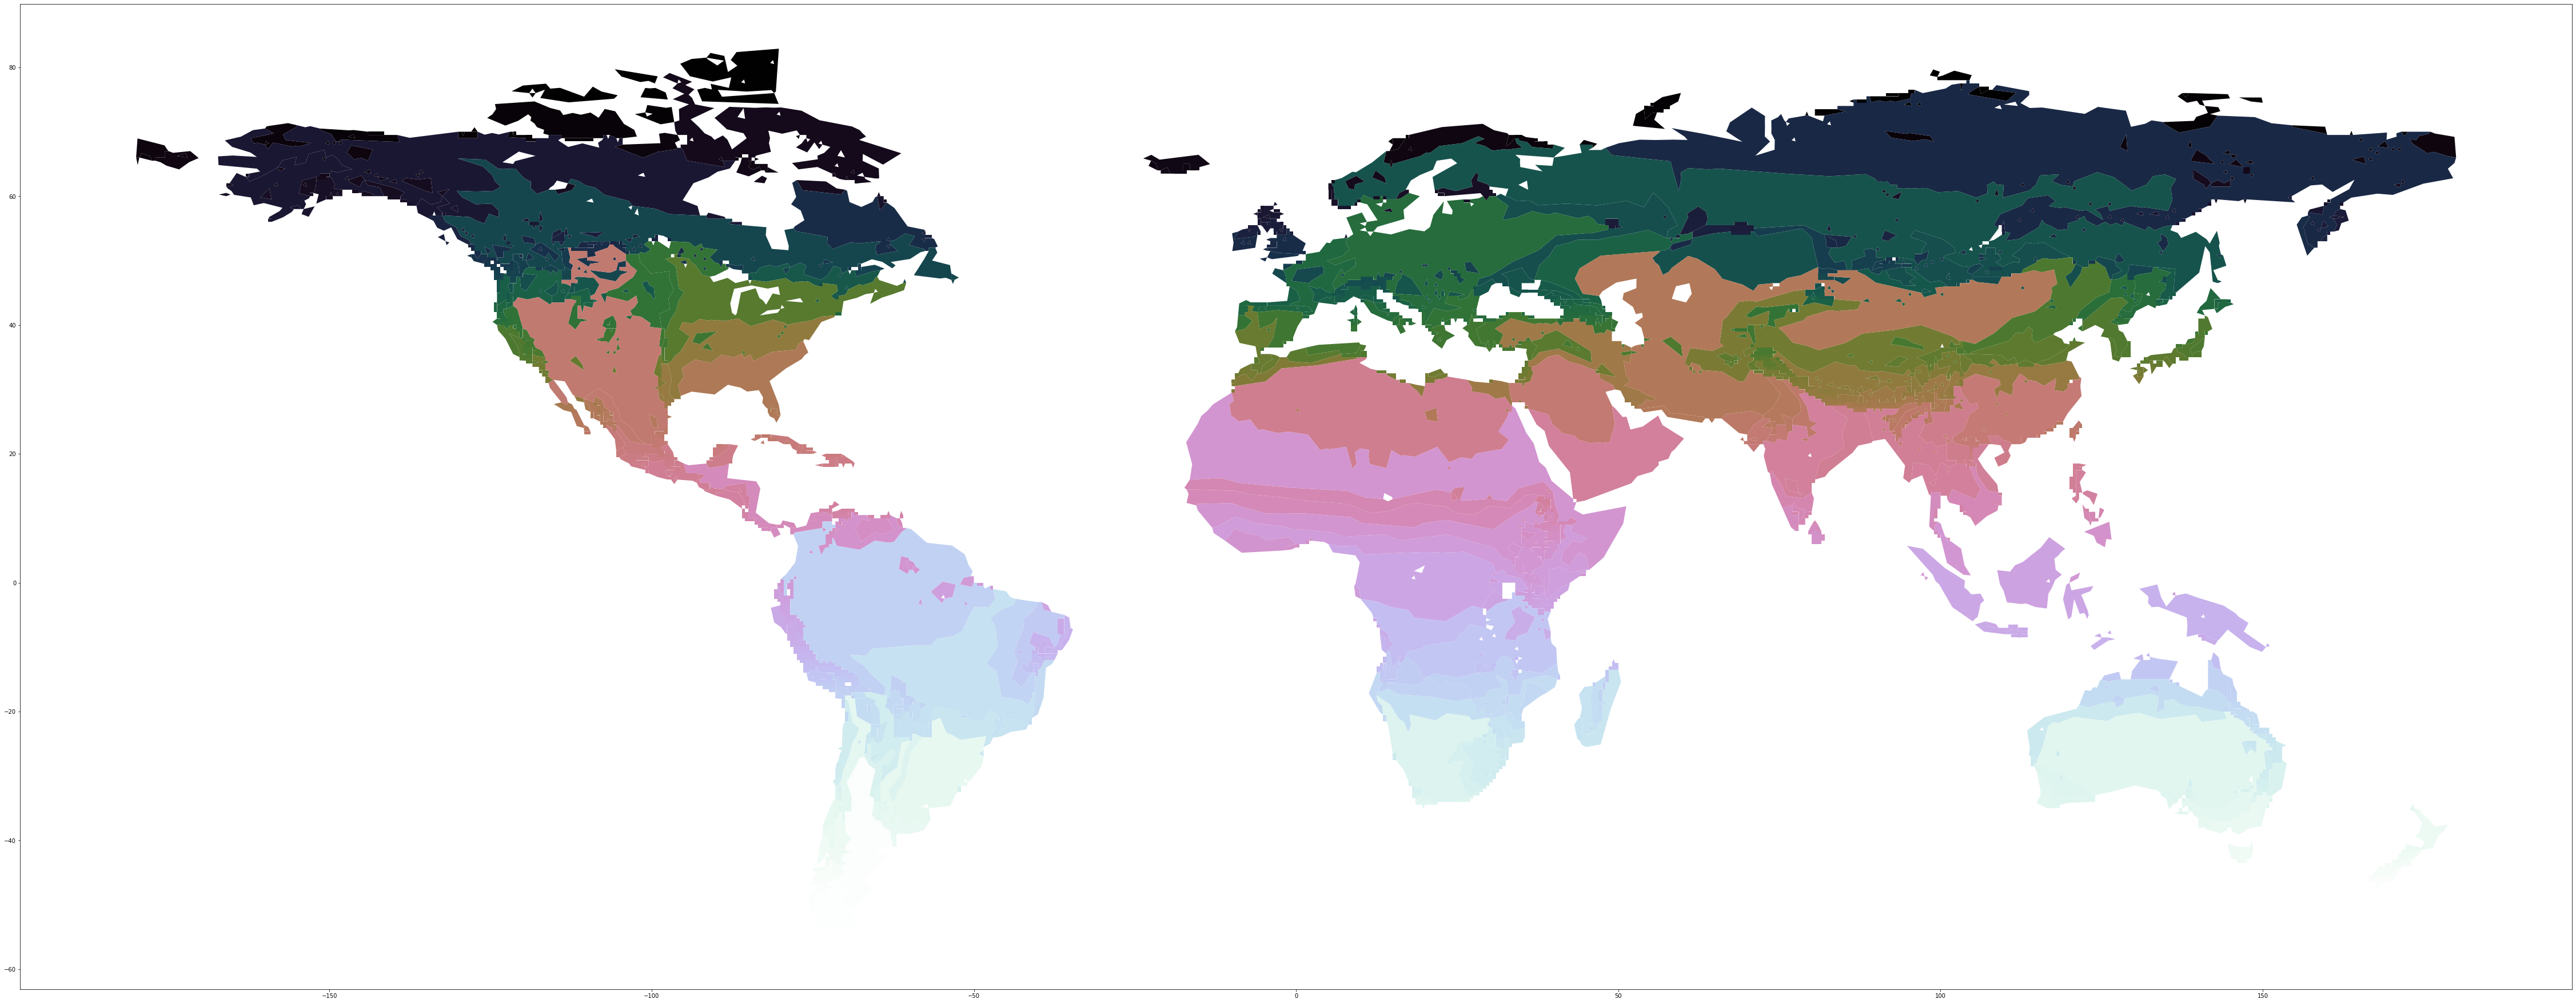

In [57]:
gaez.plot(figsize=(80, 40), cmap='cubehelix')

In [60]:
kg = cz.prepare_shapefile('koppen-geiger/Shapefiles/world_climates_completed_koppen_geiger.shp')
print(kg)

           dn climates_f                                           geometry
shapeid                                                                    
0        31.0         ET  POLYGON ((-37.00000 83.75000, -36.75000 83.750...
1        30.0         EF  POLYGON ((-32.41667 83.58333, -31.75000 83.583...
2        30.0         EF  POLYGON ((-31.16667 83.50000, -30.91667 83.500...
3        30.0         EF  POLYGON ((-40.58333 83.33333, -40.33333 83.333...
4        31.0         ET  POLYGON ((-42.33333 83.50000, -42.25000 83.500...
...       ...        ...                                                ...
25138    32.0       None  POLYGON ((-69.50000 -80.91667, -69.41667 -80.9...
25139    30.0         EF  POLYGON ((-47.33333 -77.66667, -45.83333 -77.6...
25140    32.0       None  POLYGON ((-65.00000 -82.25000, -64.91667 -82.2...
25141    32.0       None  POLYGON ((-180.00000 90.00000, 180.00000 90.00...
25142    30.0         EF  POLYGON ((-58.50000 -63.25000, -58.08333 -63.2...

[25143 rows

<AxesSubplot:>

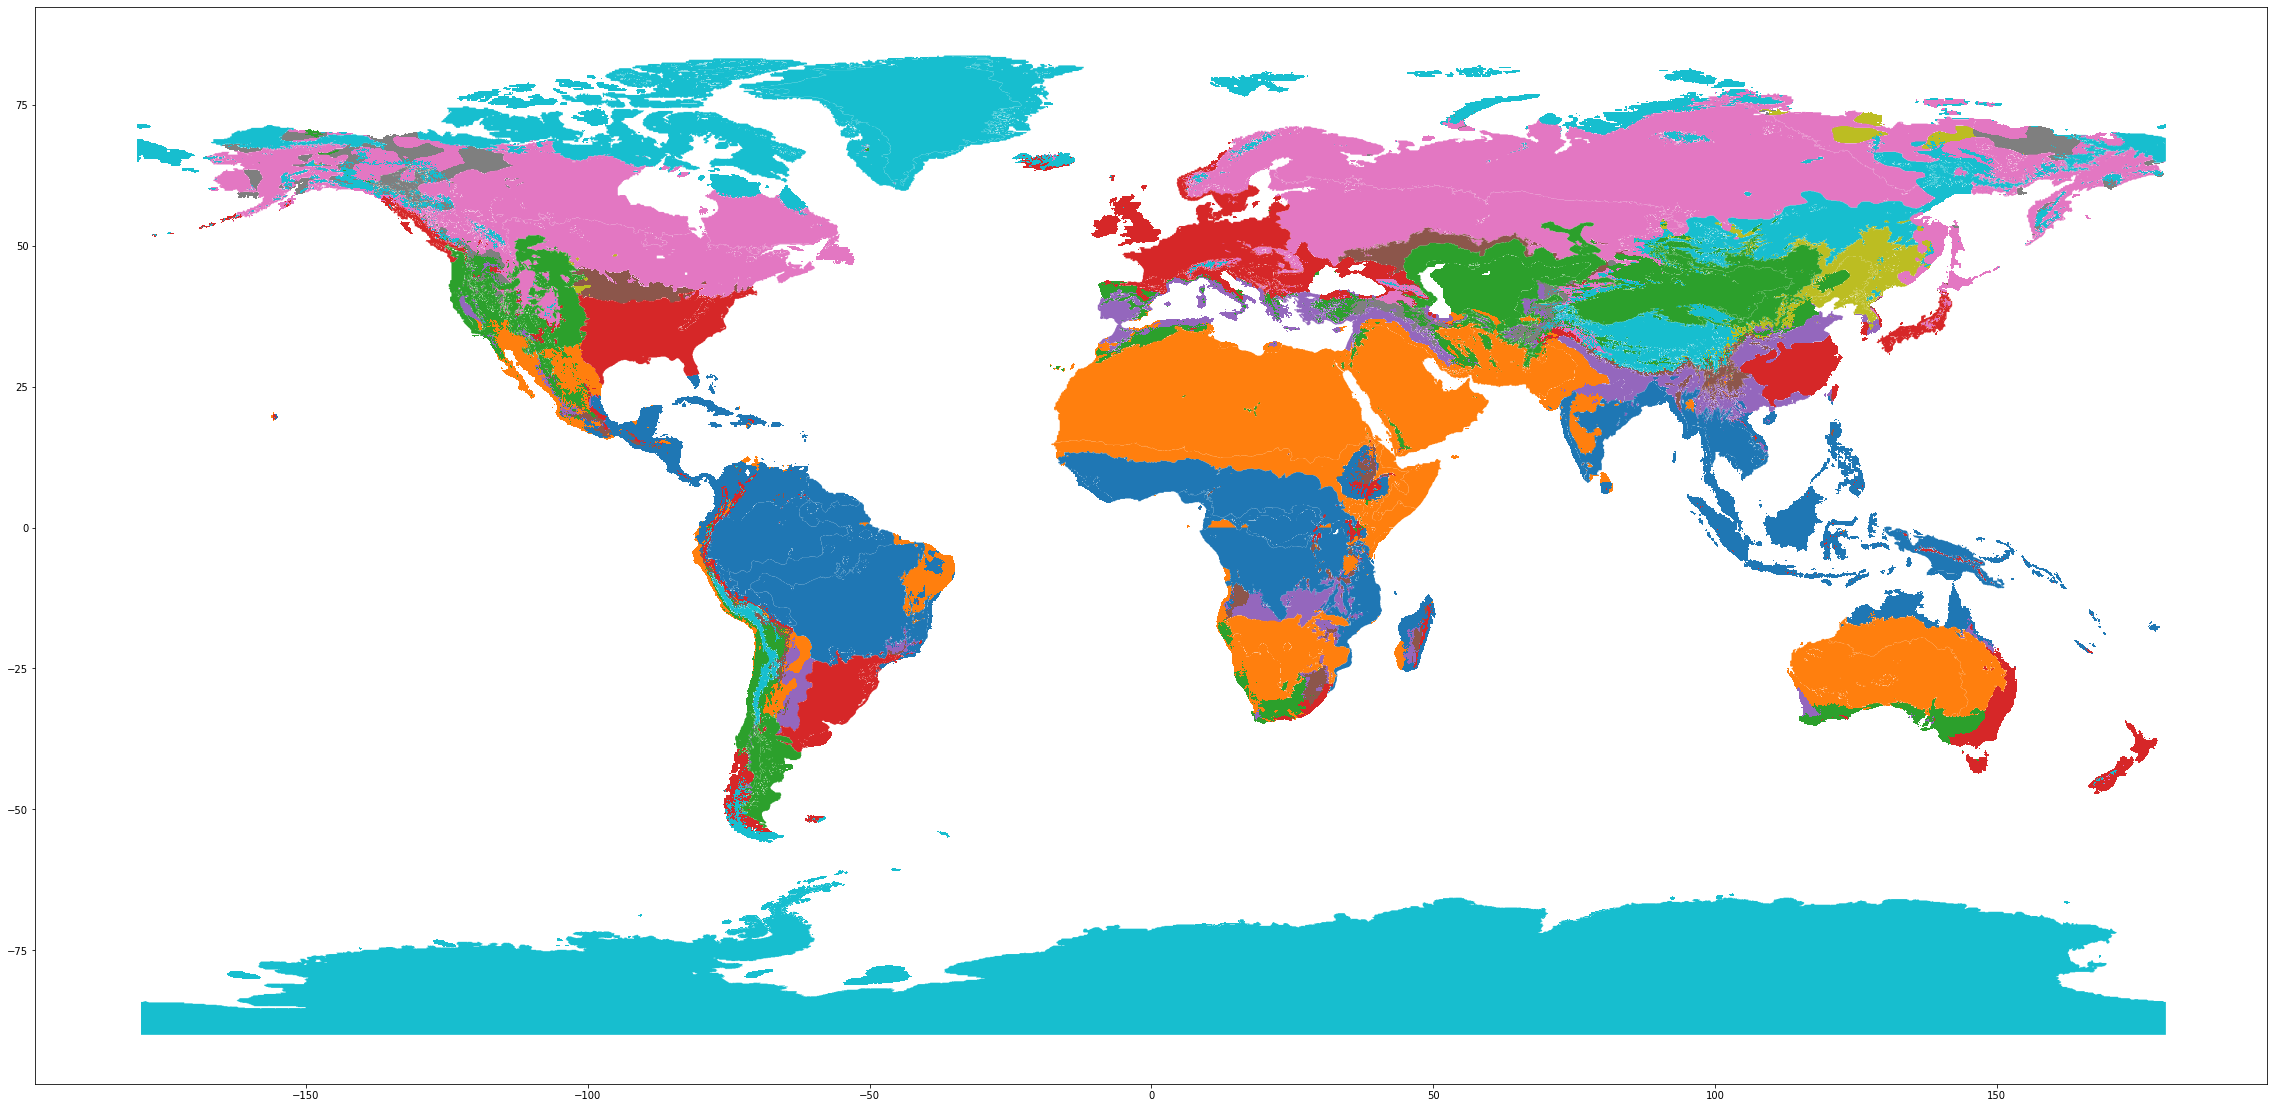

In [61]:
kg.plot(figsize=(40, 20), column='climates_f')

In [59]:
#kgi.query_bulk(points.geometry, predicate="within")

In [63]:

def sjoin(gpd):
    return pd.DataFrame(points.sindex.query_bulk(gpd.geometry)) \
            .transpose() \
            .rename(columns={0:'shapeid', 1:'pointid'}) \
            .join(gpd, on='shapeid') \
            .join(points, on="pointid", rsuffix="_pt") 
        
kgq = sjoin(kg)
gq = sjoin(gaez)
kgq, gq

(          shapeid   pointid    dn climates_f  \
 0              73   6396367  30.0         EF   
 1              73   6396366  30.0         EF   
 2              73   6396365  30.0         EF   
 3              73   6396362  30.0         EF   
 4              73   3053552  30.0         EF   
 ...           ...       ...   ...        ...   
 22408321    25142  11871906  30.0         EF   
 22408322    25142  11872355  30.0         EF   
 22408323    25142  11871989  30.0         EF   
 22408324    25142  11716285  30.0         EF   
 22408325    25142  14413329  30.0         EF   
 
                                                    geometry      gbifid  \
 0         POLYGON ((62.25000 81.75000, 62.50000 81.75000...  2575938037   
 1         POLYGON ((62.25000 81.75000, 62.50000 81.75000...  2575938036   
 2         POLYGON ((62.25000 81.75000, 62.50000 81.75000...  2575938035   
 3         POLYGON ((62.25000 81.75000, 62.50000 81.75000...  2575938032   
 4         POLYGON ((62.25000 

In [64]:
g = kgq.groupby(by="pointid")
dupepoints = g.max()[g.count().dn > 1]

/var/folders/_q/53vgc1_j387g1bwk313yffg40000gn/T/ipykernel_534/1821790968.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  dupepoints = g.max()[g.count().dn > 1]


In [65]:
duperows = kgq[kgq.pointid.isin(dupepoints.index)]

In [71]:
duperowsg =  gpd.GeoDataFrame(duperows, geometry=duperows.geometry)

In [72]:
duperowsg.to_

,shapeid,pointid,dn,climates_f,geometry,gbifid,lat,long,geometry_pt
0,73,6396367,30.0,EF,"POLYGON ((62.25000 81.75000, 62.50000 81.75000...",2575938037,62.430000,81.660000,POINT (62.43000 81.66000)
1,73,6396366,30.0,EF,"POLYGON ((62.25000 81.75000, 62.50000 81.75000...",2575938036,62.430000,81.660000,POINT (62.43000 81.66000)
2,73,6396365,30.0,EF,"POLYGON ((62.25000 81.75000, 62.50000 81.75000...",2575938035,62.430000,81.660000,POINT (62.43000 81.66000)
3,73,6396362,30.0,EF,"POLYGON ((62.25000 81.75000, 62.50000 81.75000...",2575938032,62.430000,81.660000,POINT (62.43000 81.66000)
4,73,3053552,30.0,EF,"POLYGON ((62.25000 81.75000, 62.50000 81.75000...",1699909242,62.438050,81.676510,POINT (62.43805 81.67651)
...,...,...,...,...,...,...,...,...,...
22408321,25142,11871906,30.0,EF,"POLYGON ((-58.50000 -63.25000, -58.08333 -63.2...",3383904609,-38.733050,-71.239904,POINT (-38.73305 -71.23990)
22408322,25142,11872355,30.0,EF,"POLYGON ((-58.50000 -63.25000, -58.08333 -63.2...",3383924578,-38.733050,-71.239904,POINT (-38.73305 -71.23990)
22408323,25142,11871989,30.0,EF,"POLYGON ((-58.50000 -63.25000, -58.08333 -63.2...",3383908624,-38.733050,-71.239904,POINT (-38.73305 -71.23990)
22408324,25142,11716285,30.0,EF,"POLYGON ((-58.50000 -63.25000, -58.08333 -63.2...",3320918450,-39.295807,-65.662654,POINT (-39.29581 -65.66265)


In [ ]:
fixed = duperowsg[duperowsg.geometry.contains(duperowsg.geometry_pt)]
fixed

In [38]:
kg.loc[kg.geometry.contains(Point(51.702608, 35.356928))]

,dn,climates_f,geometry
shapeid,,,
13130,5.0,BSh,"POLYGON ((51.33333 35.58333, 51.58333 35.58333..."


In [41]:
points[points.index == 5127878]

,gbifid,lat,long,geometry
pointid,,,,
5127878,2251952102,51.702608,35.356928,POINT (51.70261 35.35693)


In [47]:
for i in range(1000):
    cr = spoints.query(kg.geometry.iloc[i])
    
    print(i)
    
    if len(cr) > 0:
        print(cr)
        break
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
[ 6396367  6396366  6396365  6396362  3053552  3053504  3053506  3053507
  3053544  3053542  3053539  3053538  3053533  3053420  3053425  3053523
  3053522  3053520  3053483  3053433  3053434  3053519  3053462  3053550
  3053416  3053417  3053466  3053480  3053570  3053418  3053437  3053481
  3053565  3053553  3053572  3053479  3053501  3053411  3053439  3053502
  3053438  3053503  3053412  3053414  3053530  3053526  3053421  3053422
  3053547  3053548  3053423  3053424  3053525  3053461  3053465  3053517
  3053364  3053436  3053435  3053515  3053482  3053514  3053512  3053511
  3053444  3053498  3053499  3053443  3053477  3053442  3053440  3053616
  3053593  3053500  3053447  3053446  3053398  3053445  3053407  3053460
  3053468  3053484  3053467  3053497  3053452  3053510  30

In [16]:
kg.geometry

0        POLYGON ((-37.00000 83.75000, -36.75000 83.750...
1        POLYGON ((-32.41667 83.58333, -31.75000 83.583...
2        POLYGON ((-31.16667 83.50000, -30.91667 83.500...
3        POLYGON ((-40.58333 83.33333, -40.33333 83.333...
4        POLYGON ((-42.33333 83.50000, -42.25000 83.500...
                               ...                        
25138    POLYGON ((-69.50000 -80.91667, -69.41667 -80.9...
25139    POLYGON ((-47.33333 -77.66667, -45.83333 -77.6...
25140    POLYGON ((-65.00000 -82.25000, -64.91667 -82.2...
25141    POLYGON ((-180.00000 90.00000, 180.00000 90.00...
25142    POLYGON ((-58.50000 -63.25000, -58.08333 -63.2...
Name: geometry, Length: 25143, dtype: geometry